02で前処理をしたデータの読み込みと03で学習したモデルを使って推論を行うためのnotebookです。  

## 必要なライブラリのimport

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
# 予測したいデータの読み込み
path_test_preprp = '../../../../data/processed/test_processed_0619.csv'

test = pd.read_csv(path_test_preprp)

## 保存されたモデルを使って予測を行う

In [3]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_0619/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [4]:
# 予測結果を出力する
print(predictions)

[-2.03563377 -0.09126501  0.31174409 ...  1.05227203 -2.54199141
  0.07499466]


## 提出用ファイルの作成

In [5]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_0619.csv", index=False)

<Axes: ylabel='Frequency'>

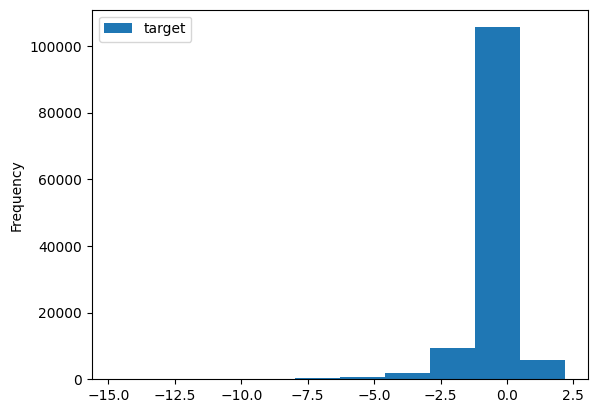

In [6]:
sub_df.plot.hist()

In [7]:
sub_df

,card_id,target
0,C_ID_0ab67a22ab,-2.035634
1,C_ID_130fd0cbdd,-0.091265
2,C_ID_b709037bc5,0.311744
3,C_ID_d27d835a9f,-0.185853
4,C_ID_2b5e3df5c2,-0.158231
...,...,...
123618,C_ID_7a239d2eda,0.767411
123619,C_ID_75ace375ae,0.269988
123620,C_ID_21d56d950c,1.052272
123621,C_ID_6c46fc5a9d,-2.541991
